# The Job Explorer — A Salary Analysis
### Group Bambi : Maggie Xu, Lia Wang, Ceci Chen


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from scipy import stats
from itertools import product

import warnings
sns.set()
warnings.filterwarnings("ignore")

# 1 Data Processing & Cleaning

## 1.1 Data Processing

In [ ]:
df = pd.read_csv('/content/Salary_Data_Based_country_and_race.csv')
df.head()


,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32,Male,Bachelor's,Software Engineer,5.0,"$90,000.00",UK,White
1,1,28,Female,Master's,Data Analyst,3.0,"$65,000.00",USA,Hispanic
2,2,45,Male,PhD,Senior Manager,15.0,"$150,000.00",Canada,White
3,3,36,Female,Bachelor's,Sales Associate,7.0,"$60,000.00",USA,Hispanic
4,4,52,Male,Master's,Director,20.0,"$200,000.00",USA,Asian


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6700 entries, 0 to 6699
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6700 non-null   int64  
 1   Age                  6700 non-null   int64  
 2   Gender               6700 non-null   object 
 3   Education Level      6700 non-null   object 
 4   Job Title            6700 non-null   object 
 5   Years of Experience  6700 non-null   float64
 6   Salary               6698 non-null   object 
 7   Country              6700 non-null   object 
 8   Race                 6700 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 471.2+ KB


In [ ]:
df.isna().sum()

Unnamed: 0             0
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 2
Country                0
Race                   0
dtype: int64

In [ ]:
df1 = df.dropna()
df1.drop("Unnamed: 0", axis=1, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6698 entries, 0 to 6699
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   int64  
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   object 
 6   Country              6698 non-null   object 
 7   Race                 6698 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 471.0+ KB


In [ ]:
df1['Salary'] = df1['Salary'].replace('[\$,]', '', regex=True).astype(float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6698 entries, 0 to 6699
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   int64  
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
 6   Country              6698 non-null   object 
 7   Race                 6698 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 471.0+ KB


In [ ]:
df1.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


## 1.2 Data Cleaning

In [ ]:
df1 = df1[~(df1["Gender"] == "Other")]
df1["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df1["Race"].unique()

array(['White', 'Hispanic', 'Asian', 'Korean', 'Chinese', 'Australian',
       'Welsh', 'African American', 'Mixed', 'Black'], dtype=object)

In [ ]:
df1["Education Level"] = df1["Education Level"].replace(["Bachelor's Degree", "Master's Degree", "phD"], ["Bachelor's", "Master's", "PhD"])
df1["Education Level"].unique()

array(["Bachelor's", "Master's", 'PhD', 'High School'], dtype=object)

In [ ]:
df1["Job Title"].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [ ]:
def Senior(x):
    token = x.split(" ")[0]
    if token == "Senior":
        return 1
    return 0

In [ ]:
df1["Senior"] = df1["Job Title"].apply(Senior)
df1.head(3)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White,0
1,28,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,45,Male,PhD,Senior Manager,15.0,150000.0,Canada,White,1


In [ ]:
df1["Job Title"] = df1["Job Title"].apply(lambda x: x.replace("Senior ", "")).apply(lambda x: x.replace("Junior ", ""))
len(df1["Job Title"].unique())

129

In [ ]:
df1["Country"].value_counts()

USA          1356
China        1339
Australia    1335
UK           1332
Canada       1322
Name: Country, dtype: int64

# 2. Research Questions

## 2.1 Generally, How does each feature correlate with each other and across different countries?

<Axes: >

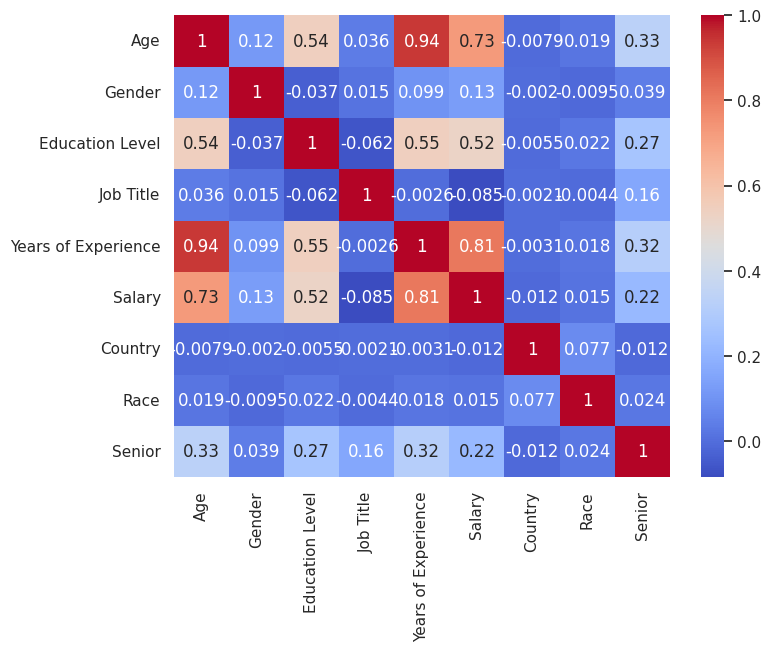

In [ ]:
df2 = df1.copy()
le  = LabelEncoder()
data = df1
data['Gender'] = le.fit_transform(data['Gender'])
data['Job Title'] = le.fit_transform(data['Job Title'])
data['Country'] = le.fit_transform(data['Country'])
data['Race'] = le.fit_transform(data['Race'])
data['Education Level'] = le.fit_transform(data['Education Level'])
data['Salary'] = data['Salary'].astype(int)
data['Age'] = data['Age'].astype(int)
data['Years of Experience'] = data['Years of Experience'].astype(int)
corr_matrix = df1.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

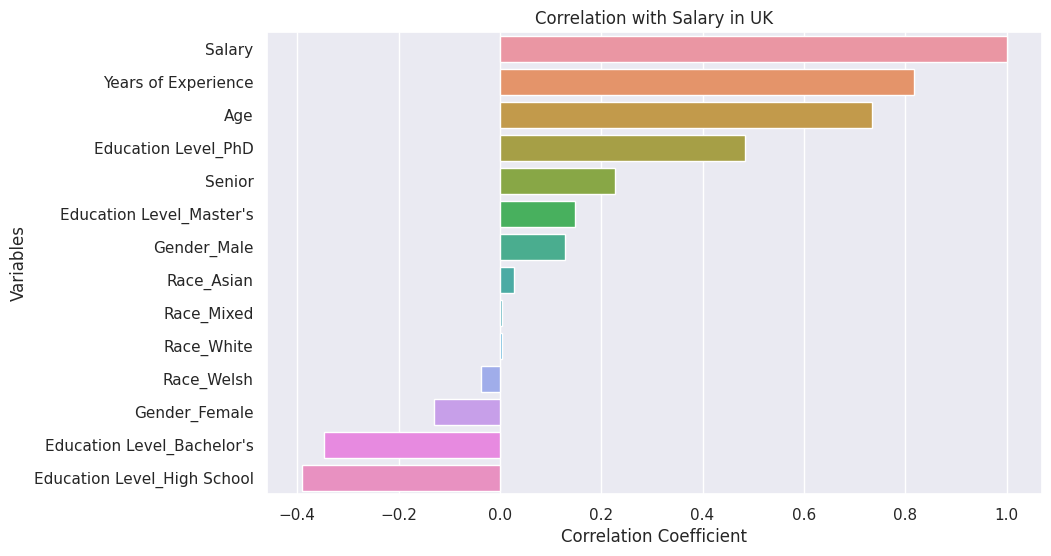

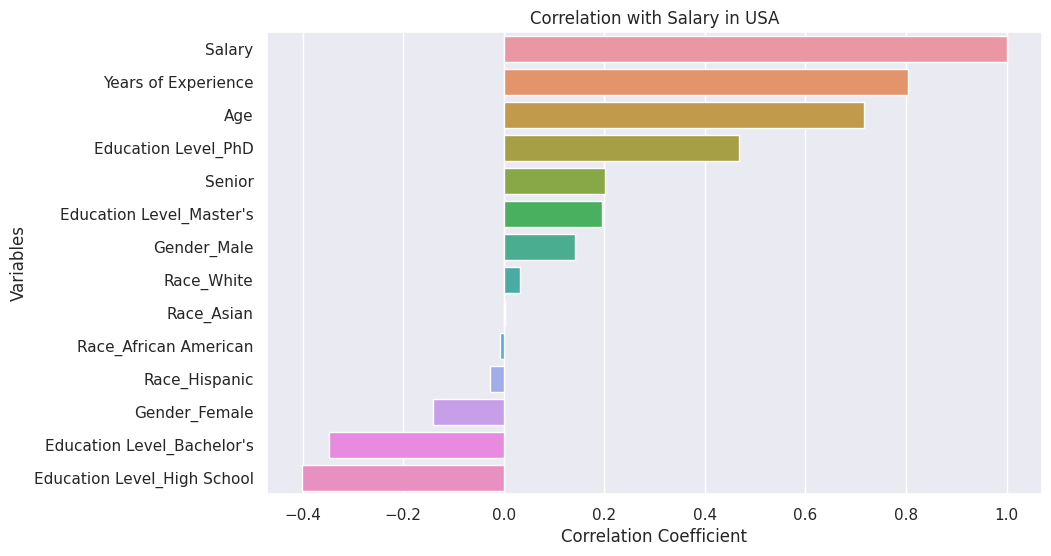

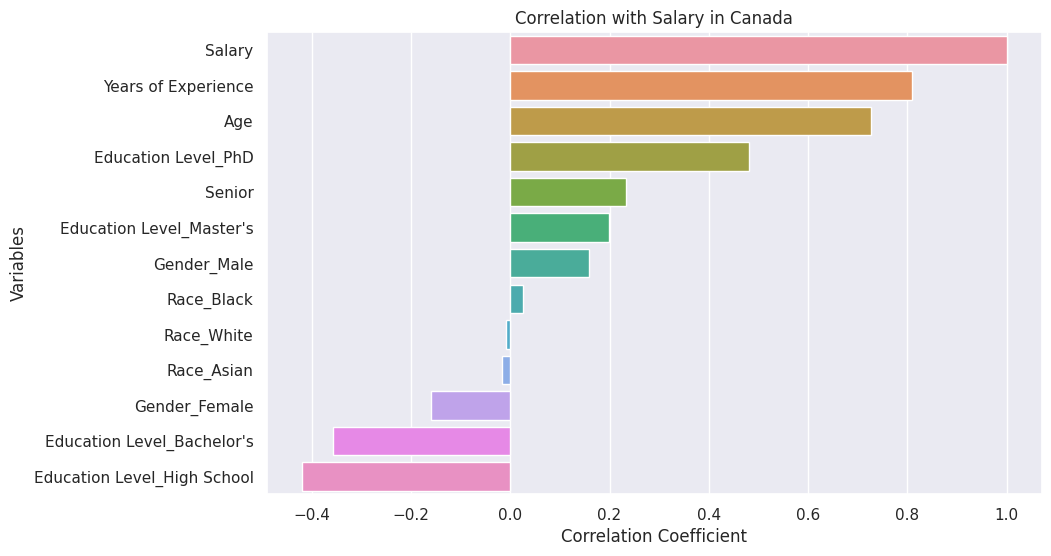

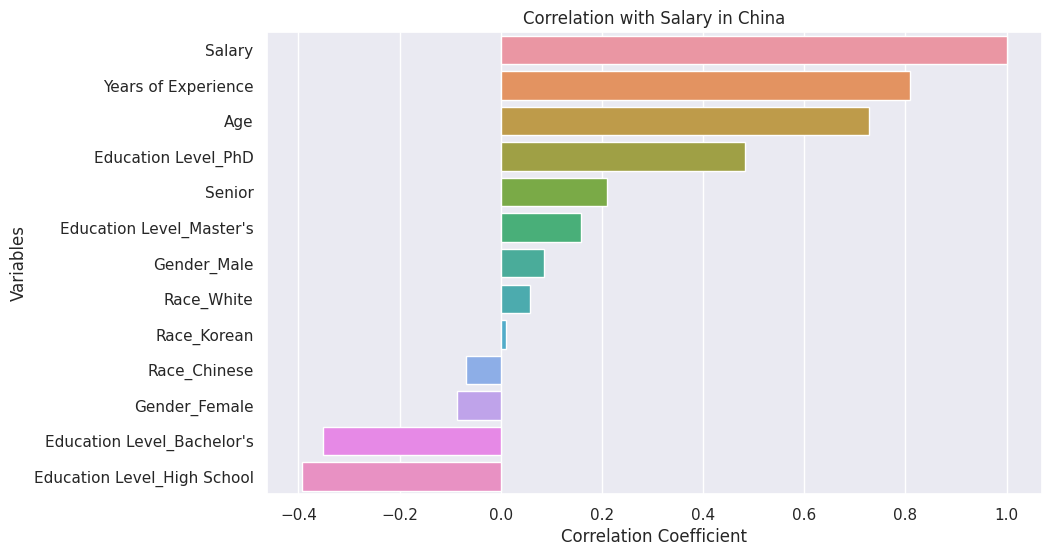

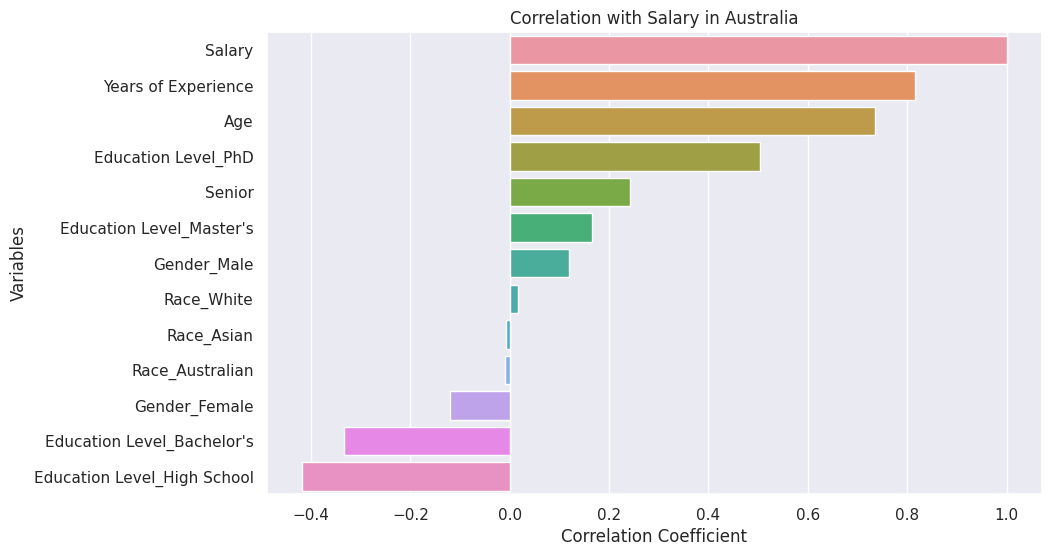

In [ ]:
df_with_dummies = pd.get_dummies(df2, columns=['Gender', 'Race', 'Education Level', 'Country'])
# Calculate correlations for each country and visualize
# Calculate correlations for each country and visualize only non-empty features.
for country in df['Country'].unique():
    # Filter for the country
    country_col = 'Country_' + country
    df_country = df_with_dummies[df_with_dummies[country_col] == 1]

    # Calculate correlation matrix and extract 'Salary' correlations, excluding the country column itself.
    correlations = df_country.corr()['Salary'].drop(labels=[country_col]).sort_values(ascending=False)

    # Drop any rows where all values are NaN to exclude features that do not have any data
    correlations = correlations.dropna()

    # If there are correlations to plot, create the visualization
    if not correlations.empty:
        plt.figure(figsize=(10, 6))
        sns.barplot(x=correlations.values, y=correlations.index)
        plt.title(f'Correlation with Salary in {country}')
        plt.xlabel('Correlation Coefficient')
        plt.ylabel('Variables')
        plt.show()

## 2.2 How are salaries distributed among males and females? Does the Gender Pay Gap exist?
## If so, does it vary across on education level or years of experience?


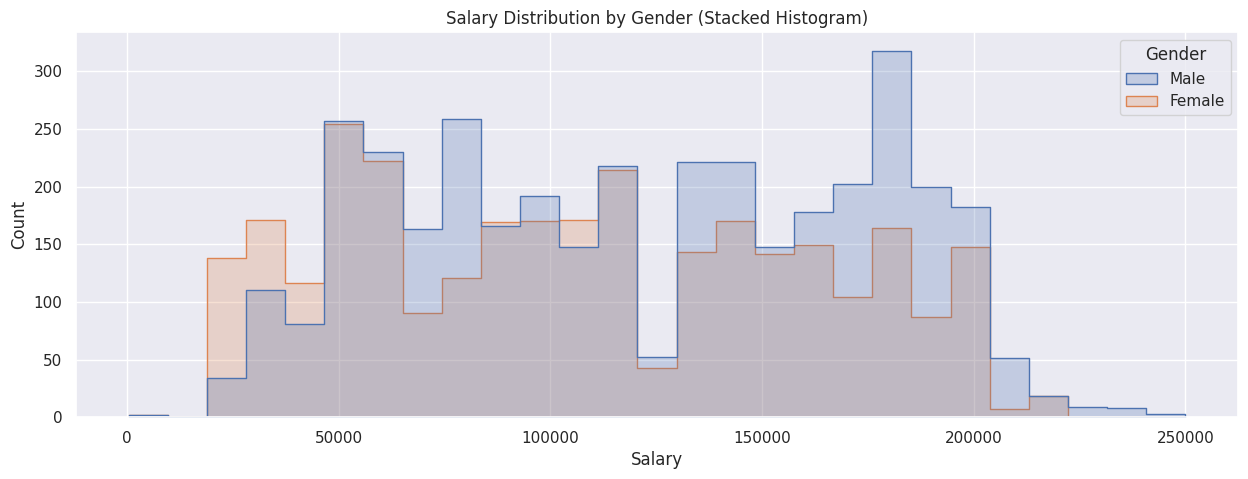

In [ ]:
plt.figure(figsize=(15, 5))
sns.histplot(data=df2, x="Salary", hue="Gender",
             element="step", common_norm=False)
plt.title("Salary Distribution by Gender (Stacked Histogram)")
plt.show()

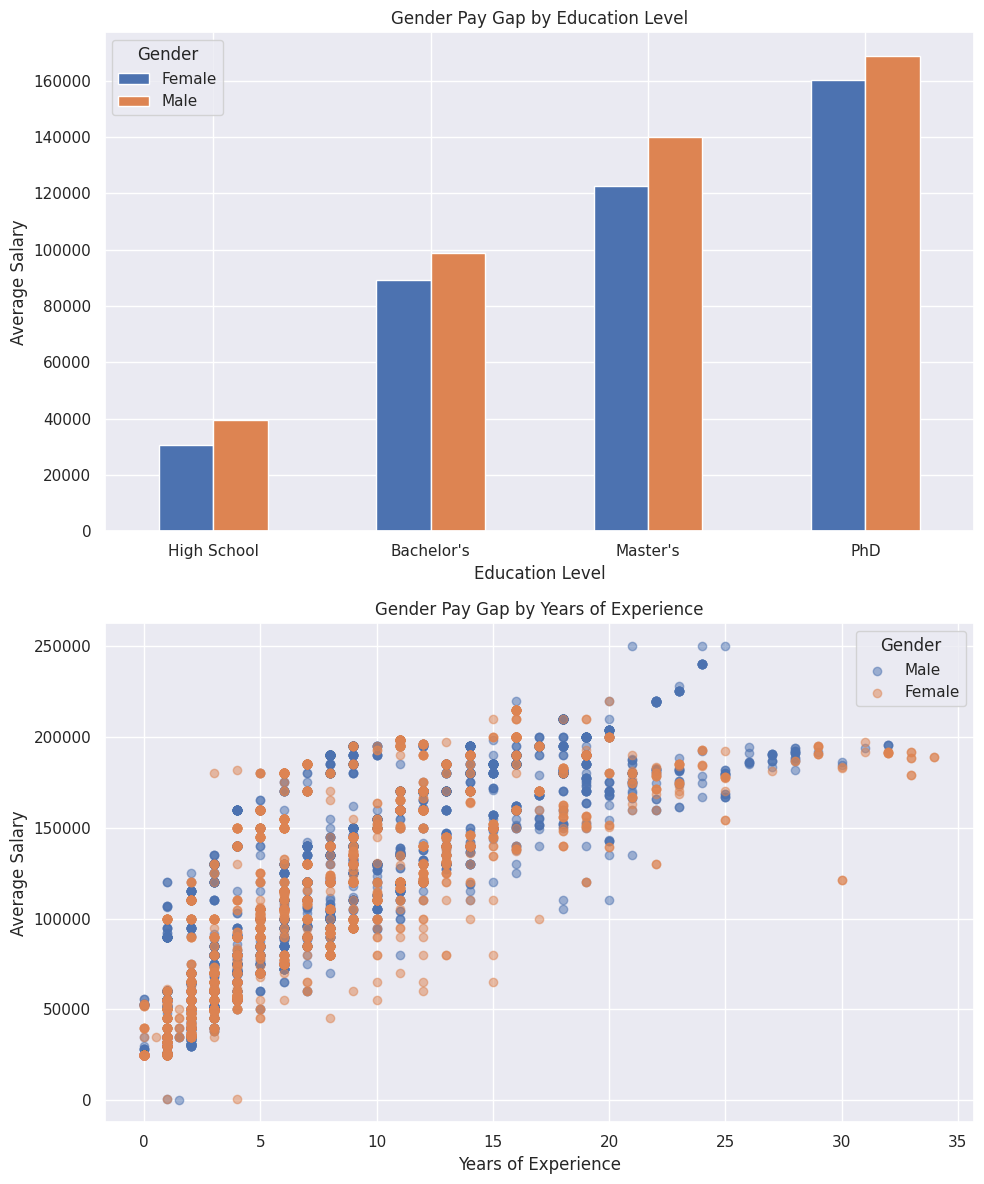

In [ ]:
# Define the order of categories
education_order = ['High School', "Bachelor's", "Master's", 'PhD']

# Create a CategoricalDtype with the specified order
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=education_order, ordered=True)

# Convert the 'Education Level' column to this categorical type
df2['Education Level'] = df2['Education Level'].astype(cat_type)

# Now calculate the gender pay gap by education level
gender_gap_by_education = df2.groupby(['Education Level', 'Gender'])['Salary'].mean().unstack()

# Create a figure and a set of subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 12))  # 2 rows, 1 column, with a larger figure size

# Plot the gender pay gap by education level on the first subplot
gender_gap_by_education.plot(kind='bar', ax=ax[0])  # ax[0] refers to the first subplot
ax[0].set_title('Gender Pay Gap by Education Level')
ax[0].set_ylabel('Average Salary')
ax[0].set_xlabel('Education Level')
ax[0].tick_params(axis='x', rotation=0)
ax[0].legend(title='Gender')

# Plot the gender pay gap by years of experience on the second subplot
for gender in df2['Gender'].unique():
    subset = df2[df2['Gender'] == gender]
    ax[1].scatter(subset['Years of Experience'], subset['Salary'], alpha=0.5, label=gender)
ax[1].set_title('Gender Pay Gap by Years of Experience')
ax[1].set_xlabel('Years of Experience')
ax[1].set_ylabel('Average Salary')
ax[1].legend(title='Gender')

# Adjust the layout so everything fits and titles and labels do not overlap
plt.tight_layout()
plt.show()


## 2.3 Group by Asian, White, and Other Races; How are salaries distributed among different racial groups? In which country, Asians (since we identify ourselves as Asians) earn the highest salary?  


in which country, Asians (since we identify ourselves as Asians) earn the highest salary?

In [ ]:
# Define the categories
race_categories = {
    'Asian': 'Asian Group',  # Asian, Korean, Chinese categorized as 'Asian Group'
    'Korean': 'Asian Group',
    'Chinese': 'Asian Group',
    'White': 'White Group',  # White categorized as 'White Group'
}

# Default category for others
default_category = 'Other Group'

# Apply categorization
df2['Race Category'] = df2['Race'].apply(lambda x: race_categories.get(x, default_category))

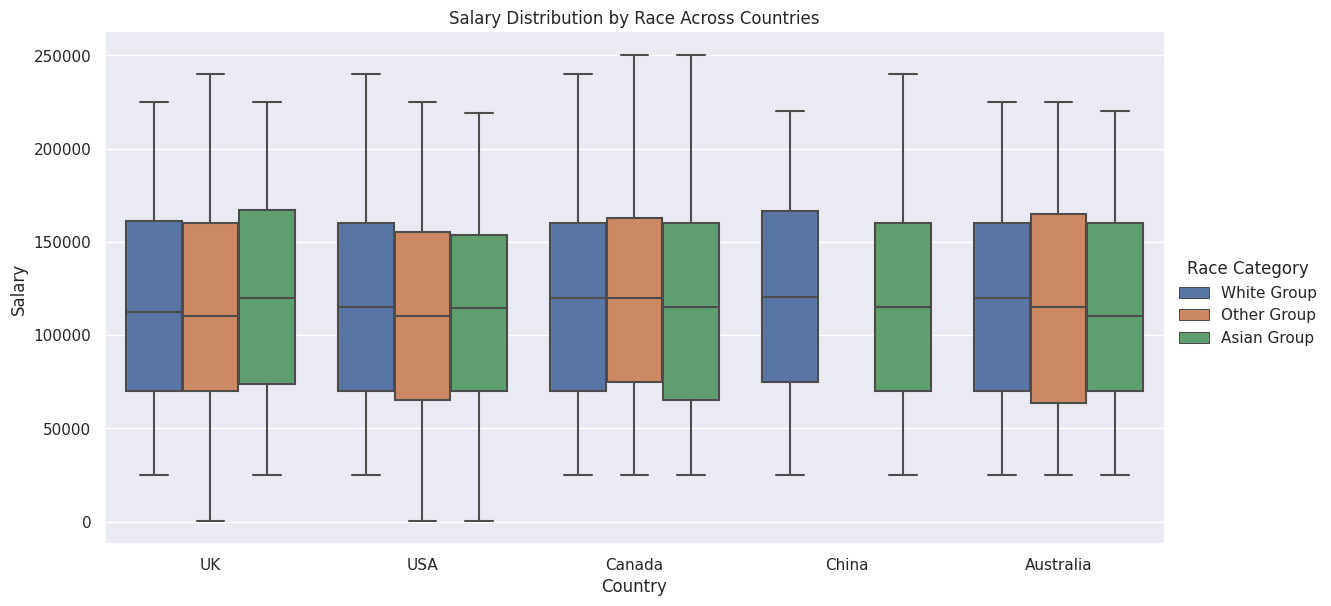

In [ ]:
# Use seaborn's catplot to create a boxplot with 'Country' and 'Race' as categories
sns.catplot(x='Country', y='Salary', hue='Race Category', data=df2, kind='box', height=6, aspect=2)
plt.title('Salary Distribution by Race Across Countries')
plt.show()

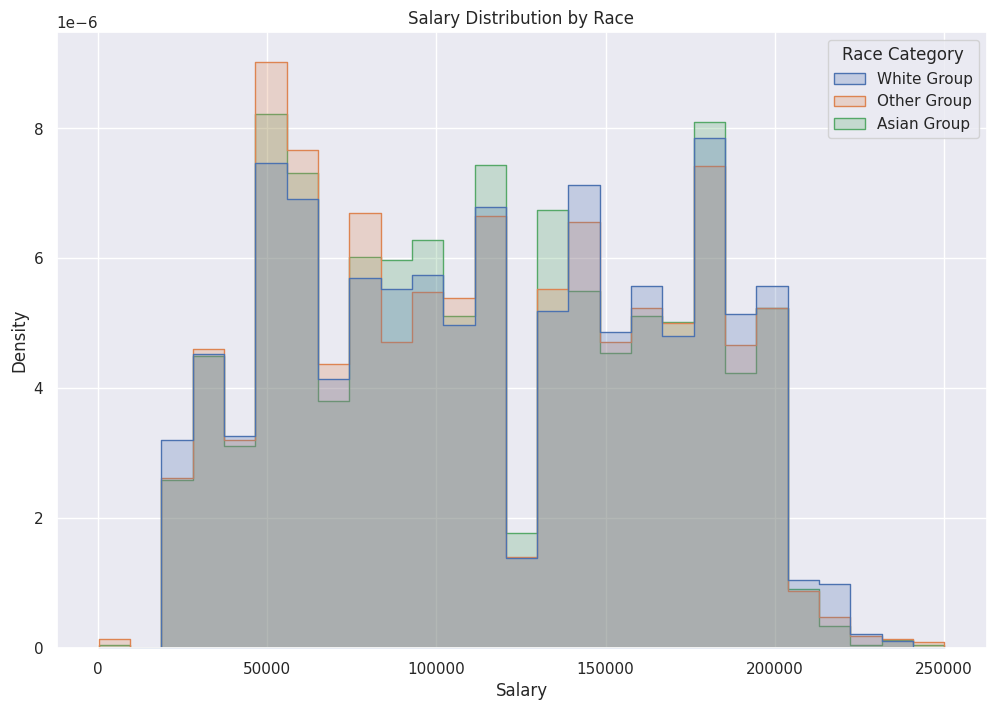

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df2, x="Salary", hue="Race Category", element="step", stat="density", common_norm=False, kde=False)
plt.title('Salary Distribution by Race')
plt.xlabel('Salary')
plt.ylabel('Density')
plt.show()

## 2.4 In Data industry(Data Analyst, Data Engineer, Data Entry Clerk, Data Scientist, Chief Data Officer), which country (China or USA) has higher salary?

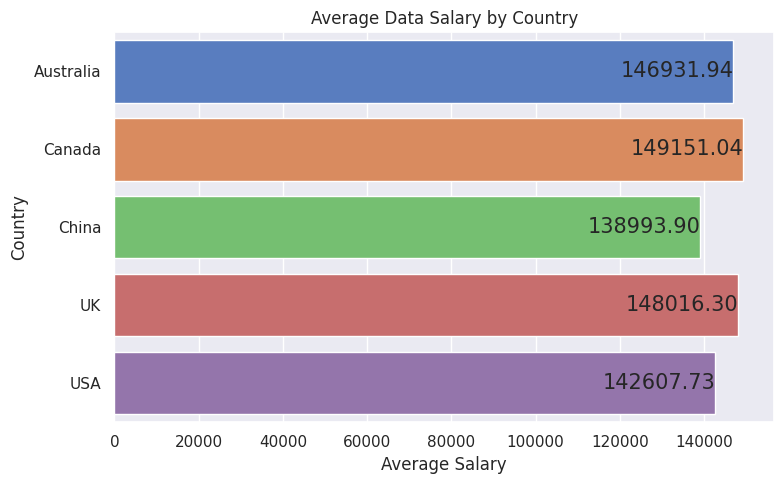

In [ ]:
data_industry = df2[df2['Job Title'].isin(['Data Analyst', 'Data Engineer', 'Data Entry Clerk', 'Data Scientist', 'Chief Data Officer'])]
avg_country= pd.DataFrame(data_industry.groupby('Country')['Salary'].mean())
avg_country = avg_country.reset_index()

# plot for average salary for data industry in each country
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_country.Salary, y=avg_country.Country, palette="muted",data = avg_country)
plt.title('Average Data Salary by Country')
plt.xlabel('Average Salary')
plt.ylabel('Country')
plt.tight_layout()

# Add data labels
for index, value in enumerate(avg_country.Salary):
    plt.text(value + 100, index, f'{value:.2f}', ha='right', va='center', fontsize=15)

plt.show()


In [ ]:
df_china_us = df2[df2['Country'].isin(['USA', 'China'])]

In [ ]:
data_job_title = ['Data Analyst', 'Data Engineer', 'Data Entry Clerk', 'Data Scientist', 'Chief Data Officer']
data_jobs = df_china_us[df_china_us['Job Title'].isin(data_job_title)]
data_jobs.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,Race Category
1,28,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic,0,Other Group
32,29,Male,Master's,Data Scientist,3.0,75000.0,USA,Hispanic,0,Other Group
63,47,Male,PhD,Data Scientist,21.0,180000.0,China,White,1,White Group
81,41,Female,Master's,Data Analyst,13.0,80000.0,USA,White,0,White Group
105,44,Male,PhD,Chief Data Officer,16.0,220000.0,USA,African American,0,Other Group


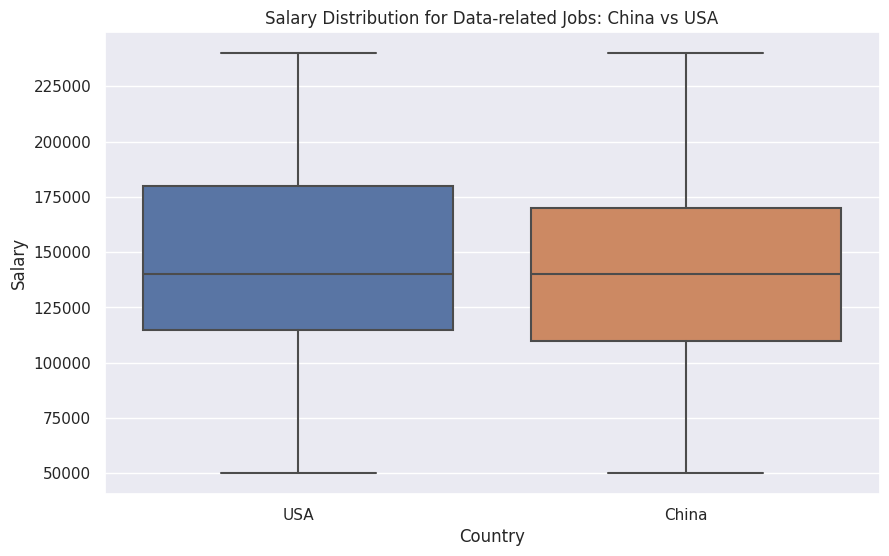

In [ ]:
# Plot salary distribution for data industry jobs for China and USA
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='Salary', data=data_jobs)
plt.title('Salary Distribution for Data-related Jobs: China vs USA')
plt.ylabel('Salary')
plt.xlabel('Country')
plt.show()

In [ ]:
data_df = data_jobs.loc[:,['Salary','Country','Gender']]
data_df.head()

,Salary,Country,Gender
1,65000.0,USA,Female
32,75000.0,USA,Male
63,180000.0,China,Male
81,80000.0,USA,Female
105,220000.0,USA,Male


#### Hypothesis Test 1: Is there a significant difference on data industry payment in China & USA?

H0: There is no significant difference in Data industry payment in USA and China.\
H1: Data industry jobs earn more in USA than China

In [ ]:
USA_Salary = data_df[data_df.Country == 'USA'].drop(['Country','Gender'], axis = 1)
China_Salary = data_df[data_df.Country == 'China'].drop(['Country','Gender'], axis = 1)

In [ ]:
# Perform a two-sample t-test to compare the data salary: mann-whitney
alpha = 0.05
u_statistics, p_value = stats.mannwhitneyu(USA_Salary, China_Salary, alternative='greater')
print(f"Q1: t-statistic: {u_statistics}, p-value: {p_value}")

if p_value < alpha:
    print("p-value = {}".format(p_value),"< alpha; reject the null hypothesis.")
    print("Data related jobs earn more in USA than China")
else:
    print("p-value = {}".format(p_value),"> alpha; fail to reject the null hypothesis.")
    print("No significant difference in Data related jobs payment in USA and China.")

Q1: t-statistic: [15946.], p-value: [0.11597032]
p-value = [0.11597032] > alpha; fail to reject the null hypothesis.
No significant difference in Data related jobs payment in USA and China.


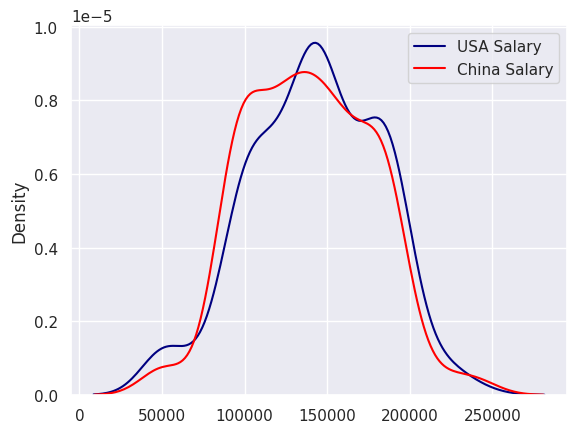

In [ ]:
# Plot to look at two distributions
sns.distplot(USA_Salary, hist=False, color="navy", label="USA Salary")
sns.distplot(China_Salary, hist=False, color="red", label="China Salary")
plt.legend()
plt.show()

#### Hypothesis Test 2: Is there a significant difference on data industry payment for female in China & USA?

H0: There is no significant difference in Data industry payment for female in USA and China.\
H1: Female in Data industry jobs earn more in USA than China

In [ ]:
USA_Female = data_df[(data_df.Country == 'USA') & (data_df.Gender == 'Female')].drop(['Country','Gender'], axis = 1)
China_Female = data_df[(data_df.Country == 'China') & (data_df.Gender == 'Female')].drop(['Country','Gender'], axis = 1)

In [ ]:
# Perform a two-sample t-test to compare the female salary: mann-whitney
alpha = 0.05
u_statistics, p_value = stats.mannwhitneyu(USA_Female, China_Female, alternative='greater')
print(f"Q1: t-statistic: {u_statistics}, p-value: {p_value}")

if p_value < alpha:
    print("p-value = {}".format(p_value),"< alpha; reject the null hypothesis")
    print("Female who take Data industry jobs earn more in USA than China.")
else:
    print("p-value = {}".format(p_value),"> alpha; fail to reject the null hypothesis.")
    print("No significant difference in female Data industry payment in USA and China.")

Q1: t-statistic: [1941.5], p-value: [0.71771199]
p-value = [0.71771199] > alpha; fail to reject the null hypothesis.
No significant difference in female Data industry payment in USA and China.


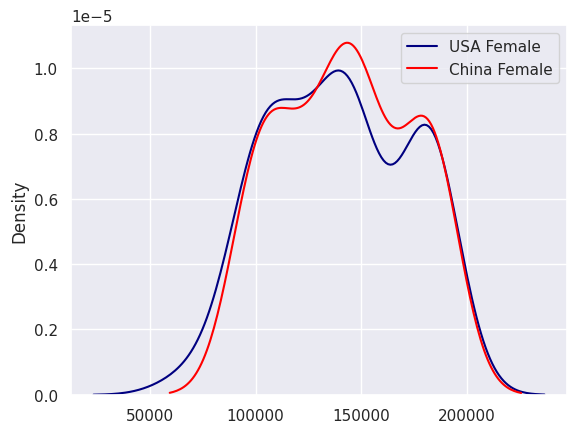

In [ ]:
# Plot to look at two distributions
sns.distplot(USA_Female, hist=False, color="navy", label="USA Female")
sns.distplot(China_Female, hist=False, color="red", label="China Female")
plt.legend()
plt.show()

# 3. Machine Learning Models For Prediction

In [ ]:
# Prepare test & train data
np.random.seed(1007)
# Separating predictors and target variable
# Predictors exclude strong positive correlated features: Age, Years of Experience, Senior
X = df2.drop(['Salary','Age','Years of Experience','Senior','Race Category'], axis=1)  # Predictor variables
y = df2['Salary']  # Target variable

# Splitting the data into train and test sets: train/test split = 0.8/0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing categorical variables
categorical_cols = ['Gender', 'Education Level', 'Job Title', 'Country', 'Race']
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'
)


In [ ]:
# Prepare data for prediction
Gender = pd.DataFrame(df2.Gender.unique(), columns = ['Gender'])
EducationLevel = pd.DataFrame(df2['Education Level'].unique(), columns = ['Education Level'])
JobTitle = pd.DataFrame(df2['Job Title'].unique(), columns = ['Job Title'])
Country = pd.DataFrame(df2.Country.unique(), columns = ['Country'])
Race = pd.DataFrame(df2.Race.unique(), columns = ['Race'])


# Grouping by 'Country' and getting unique races for each country
grouped = df2.groupby('Country')['Race'].unique()

# Create combinations for each country separately and combine with other columns
pairwise_combinations = []

for country, races in grouped.items():
    # Create combinations of other features with the races for each country
    combinations = list(product(races, [country]))
    pairwise_combinations.extend(combinations)

# Add other feature combinations (Gender, EducationLevel, JobTitle)
other_feature_combinations = list(product(EducationLevel['Education Level'],
                                         Gender['Gender'],
                                         JobTitle['Job Title']))

# Extend the combinations for each race and country with other feature combinations
final_combinations = [(race, country, *other_feats) for race, country in pairwise_combinations for other_feats in other_feature_combinations]

# Create a DataFrame from the combinations
columns = ['Race', 'Country', 'Education Level', 'Gender', 'Job Title']
new_data = pd.DataFrame(final_combinations, columns=columns)

new_data.head()
#new_data.shape

,Race,Country,Education Level,Gender,Job Title
0,Australian,Australia,Bachelor's,Male,Software Engineer
1,Australian,Australia,Bachelor's,Male,Data Analyst
2,Australian,Australia,Bachelor's,Male,Manager
3,Australian,Australia,Bachelor's,Male,Sales Associate
4,Australian,Australia,Bachelor's,Male,Director


## 3.1 Linear Regression Model

In [ ]:
np.random.seed(1007)
# Creating a pipeline with preprocessing and linear regression model
model_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fitting the model
model_lr.fit(X_train, y_train)

# Getting predictions on the test set
y_pred_lr = model_lr.predict(X_test)

# Evaluate the model
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_lr)}")
print(f"R-squared: {r2_score(y_test, y_pred_lr)}\n")

intercept = model_lr.named_steps['regressor'].intercept_
print(f"Intercept: {intercept}\n")

# Accessing the coefficients (weights) for each feature
coefficients = model_lr.named_steps['regressor'].coef_
print("Coefficients:")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef}")

Mean Squared Error: 1004648311.0336144
R-squared: 0.6384741484090755

Intercept: 98568.70155409284

Coefficients:
Gender: -1915.106195588571
Education Level: 1915.1061953358567
Job Title: -7739.663718666895
Country: -35496.73660675807
Race: 14747.958331179734


In [ ]:
np.random.seed(1007)
# Make predictions using the trained model
predicted_salaries_lr = model_lr.predict(new_data)

# Add the predicted salaries to the new_data DataFrame
new_data['Predicted_Salary'] = predicted_salaries_lr

# Find the entry/person with the highest predicted salary
highest_salary_entry = new_data[new_data['Predicted_Salary'] == new_data['Predicted_Salary'].max()]

highest_salary_entry

,Race,Country,Education Level,Gender,Job Title,Predicted_Salary
8802,White,China,PhD,Male,CEO,289561.252341


## 3.2 Random Forest Model

Mean Squared Error: 1013341789.9896723
R-squared: 0.635345772689573

1. Feature 'Race' : 0.1020
2. Feature 'Country' : 0.0921
3. Feature 'Job Title' : 0.0409
4. Feature 'Education Level' : 0.0173
5. Feature 'Gender' : 0.0169


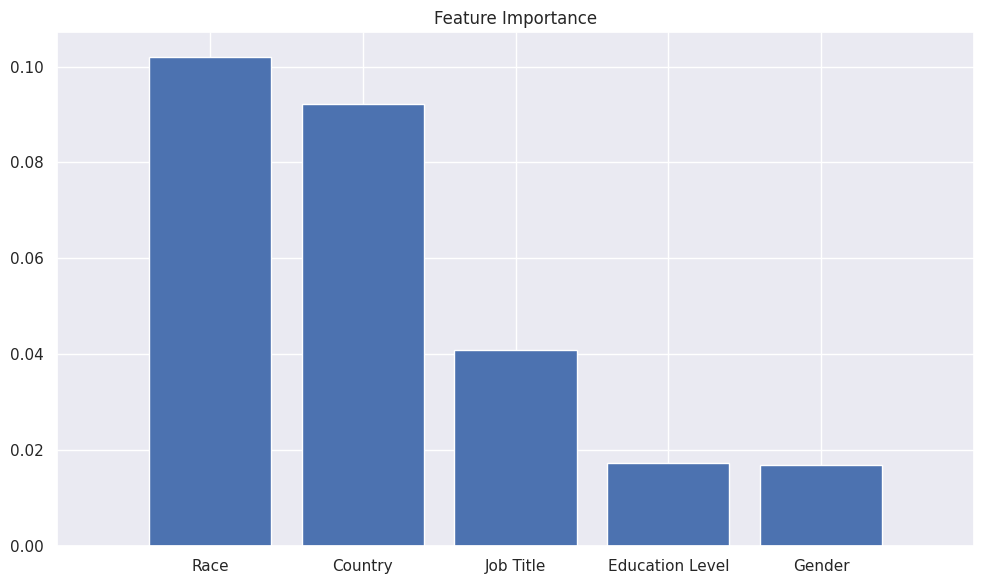

In [ ]:
np.random.seed(1007)
# Creating a pipeline with preprocessing and linear regression model
model2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Fitting the model
model2.fit(X_train, y_train)

# Getting predictions on the test set
y_pred2 = model2.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred2)
r_squared2 = r2_score(y_test, y_pred2)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared2}\n")

# Assuming 'model2' is your trained Random Forest Regressor
forest = model2.named_steps['regressor']

importances = forest.feature_importances_
num_features = len(X.columns)
importances = importances[:num_features]

# Sorting indices based on feature importance
indices = importances.argsort()[::-1]

# Feature ranking
feature_ranking = [(X.columns[i], importances[i]) for i in indices]

# Displaying feature ranking
for i, (feature, importance) in enumerate(feature_ranking, start=1):
    print(f"{i}. Feature '{feature}' : {importance:.4f}")


# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices])
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

In [ ]:
np.random.seed(1007)
# Make predictions using the trained model
predicted_salaries2 = model2.predict(new_data)

# Add the predicted salaries to the new_data DataFrame
new_data['Predicted_Salary'] = predicted_salaries2

# Find the entry/person with the highest predicted salary
highest_salary_entry2 = new_data[new_data['Predicted_Salary'] == new_data['Predicted_Salary'].max()]
highest_salary_entry2

,Race,Country,Education Level,Gender,Job Title,Predicted_Salary
15032,Asian,USA,PhD,Male,Chief Technology Officer,218955.0
